In [1]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog

# Path ke dataset
base_dir = 'C:/Users/Dendi Rifqi H/Desktop/Tugas Deeplearning-batik/DATASET SBLM AUG/'
train_dir = os.path.join(base_dir, 'Data Train')
val_dir = os.path.join(base_dir, 'Data Val')
test_dir = os.path.join(base_dir, 'Data Test')

# Fungsi untuk memuat gambar dan melakukan ekstraksi fitur HOG
def load_data_and_extract_hog(folder_path):
    labels = []
    features = []
    
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if not os.path.isdir(category_path):
            continue
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Membaca gambar dalam grayscale
            
            # Periksa apakah gambar berhasil dimuat
            if img is None:
                print(f"Warning: Unable to load image {img_path}. Skipping...")
                continue
            
            img = cv2.resize(img, (200, 200))  # Resize gambar agar seragam
            # Ekstraksi fitur HOG
            hog_features = hog(img, pixels_per_cell=(32, 32),
                               cells_per_block=(3, 3), 
                               visualize=False)
            features.append(hog_features)
            labels.append(category)
    
    return np.array(features), np.array(labels)

# Memuat data training, validation, dan test
X_train, y_train = load_data_and_extract_hog(train_dir)
X_val, y_val = load_data_and_extract_hog(val_dir)
X_test, y_test = load_data_and_extract_hog(test_dir)

# Menggabungkan data training dan validation
X_train_full = np.concatenate((X_train, X_val), axis=0)
y_train_full = np.concatenate((y_train, y_val), axis=0)

# Label encoding untuk mengubah label string menjadi angka
le = LabelEncoder()
y_train_full = le.fit_transform(y_train_full)
y_test = le.transform(y_test)

# Fungsi untuk melatih dan mengevaluasi model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc * 100:.2f}%")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    return acc

# Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_acc = train_and_evaluate_model(rf_model, X_train_full, y_train_full, X_test, y_test)

# K-Nearest Neighbors
print("\nTraining K-Nearest Neighbors...")
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_acc = train_and_evaluate_model(knn_model, X_train_full, y_train_full, X_test, y_test)

# Support Vector Machine
print("\nTraining Support Vector Machine...")
svm_model = SVC(kernel='linear')
svm_acc = train_and_evaluate_model(svm_model, X_train_full, y_train_full, X_test, y_test)

# Perbandingan akurasi model
print(f"\nRandom Forest Accuracy: {rf_acc * 100:.2f}%")
print(f"KNN Accuracy: {knn_acc * 100:.2f}%")
print(f"SVM Accuracy: {svm_acc * 100:.2f}%")

Training Random Forest...
Accuracy: 51.67%
              precision    recall  f1-score   support

      Ceplok       0.00      0.00      0.00        10
      Kawung       0.56      0.50      0.53        10
 Megamendung       0.91      1.00      0.95        10
       Nitik       0.17      0.10      0.12        10
      Parang       0.82      0.90      0.86        10
      Tambal       0.29      0.60      0.39        10

    accuracy                           0.52        60
   macro avg       0.46      0.52      0.47        60
weighted avg       0.46      0.52      0.47        60


Training K-Nearest Neighbors...
Accuracy: 56.67%
              precision    recall  f1-score   support

      Ceplok       0.32      0.60      0.41        10
      Kawung       0.83      0.50      0.62        10
 Megamendung       1.00      0.90      0.95        10
       Nitik       0.50      0.80      0.62        10
      Parang       0.75      0.60      0.67        10
      Tambal       0.00      0.00      

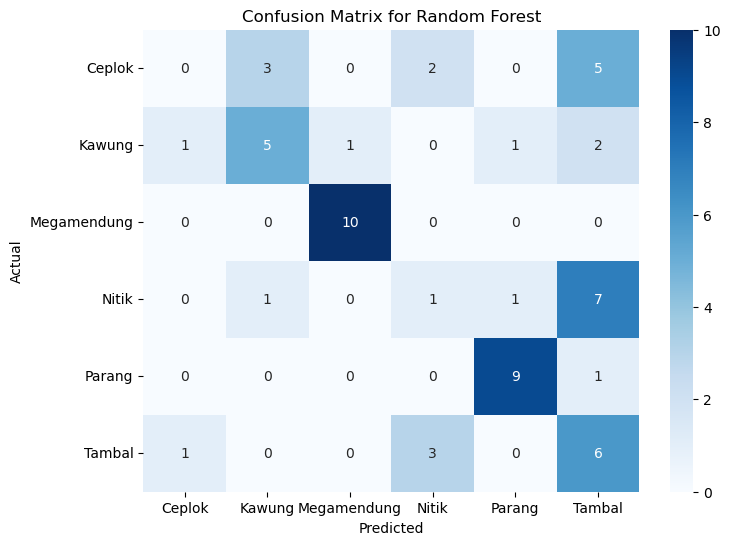

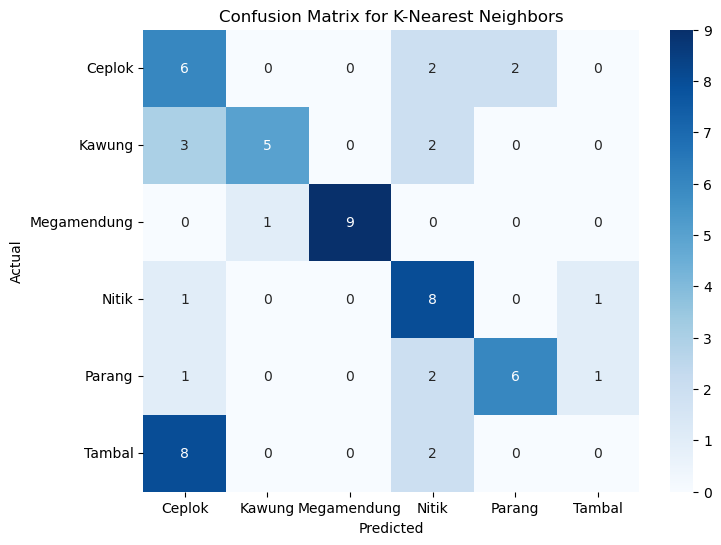

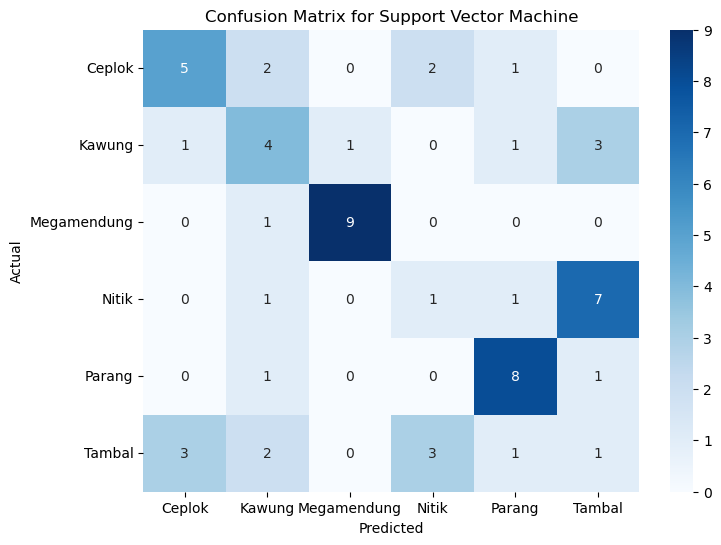

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix for {title}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Menampilkan confusion matrix untuk masing-masing model
plot_confusion_matrix(rf_model, X_test, y_test, "Random Forest")
plot_confusion_matrix(knn_model, X_test, y_test, "K-Nearest Neighbors")
plot_confusion_matrix(svm_model, X_test, y_test, "Support Vector Machine")